# 1.nn.Module

## 1. 实现全连接层

In [1]:
import torch as t
from torch.autograd import Variable as V

In [3]:
from torch import nn
%matplotlib inline

**下面只是实现一个单层的网络，输入的维度为4， 输出从维度为3 ，只用到前向传播**

In [4]:
class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        #必须调用Init构造函数
        super(Linear, self).__init__()
        #必须再__init__方法中定义需要学习的参数，并且封装成Parameter，其也是一种Variable，默认求导
        self.w = nn.Parameter(t.randn(in_features,out_features))
        self.b = nn.Parameter(t.randn(out_features))
        
    def forward(self , x):
        return  x.mm(self.w) + self.b
    

In [6]:
layer = Linear(4, 3)
input = V(t.randn(2, 4))
output = layer(input)
output

tensor([[ 1.1341,  3.7540,  1.7444],
        [-0.0550,  1.9121,  1.0419]], grad_fn=<AddBackward0>)

In [8]:
for name, parameter in layer.named_parameters():
    print(name ,parameter)
    

w Parameter containing:
tensor([[-0.2941,  0.5511, -0.5907],
        [-0.9175, -0.7003, -0.9007],
        [-1.4033, -1.1383, -0.5147],
        [ 1.0890,  1.1440, -1.0498]], requires_grad=True)
b Parameter containing:
tensor([-1.0272,  1.7030,  0.6685], requires_grad=True)


## 2.实现一个稍微复杂点的多层感知机，利用sigmoid函数作为激活函数

In [9]:
class Perceptron(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        #初始化构造函数
        nn.Module.__init__(self)
        #封装需要学习的参数
#         w1 = nn.Linear(in_features, hidden_features)
        
        #绕过定义学习的参数，直接定义层
        self.layer1 = nn.Linear(in_features, hidden_features)
        self.layer2 = nn.Linear(hidden_features, out_features)
        
    def forward(self ,x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        
        x = self.layer2(x)
        x = t.sigmoid(x)
        
        return x
    

    

In [10]:
perceptron = Perceptron(in_features= 3,hidden_features=4,out_features=1)

for name,parameter in perceptron.named_parameters():
    print (name, parameter)

layer1.weight Parameter containing:
tensor([[ 0.3182,  0.3668, -0.2883],
        [ 0.3763, -0.0372, -0.0655],
        [ 0.2850, -0.1682,  0.0035],
        [-0.1586,  0.2799,  0.5028]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.2288, -0.3000,  0.3890,  0.1524], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.1654, -0.2085,  0.1332,  0.1279]], requires_grad=True)
layer2.bias Parameter containing:
tensor([0.3593], requires_grad=True)


# 2.常用的神经网络层

## 1.图像处理相关层

In [12]:
from PIL import Image
from torchvision.transforms import ToTensor,ToPILImage
to_tensor = ToTensor()
to_pil = ToPILImage()

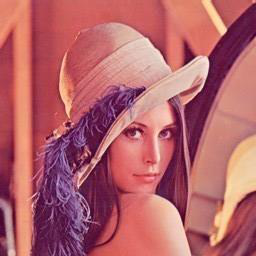

In [15]:
lena = Image.open('../../data/imgs/lena.jpg')
lena

### 图像操作

1.对彩色图像进行操作

input: tensor([[[[0.9020, 0.9059, 0.9059,  ..., 0.9451, 0.9255, 0.8275],
          [0.9020, 0.9020, 0.9059,  ..., 0.9608, 0.9255, 0.8275],
          [0.8980, 0.9020, 0.9020,  ..., 0.8627, 0.8000, 0.6941],
          ...,
          [0.3412, 0.3843, 0.3725,  ..., 0.5294, 0.5804, 0.6118],
          [0.3333, 0.3765, 0.3647,  ..., 0.5843, 0.6157, 0.6392],
          [0.3137, 0.3490, 0.3490,  ..., 0.6235, 0.6471, 0.6549]],

         [[0.5216, 0.5255, 0.5255,  ..., 0.5686, 0.5490, 0.4588],
          [0.5216, 0.5216, 0.5255,  ..., 0.5922, 0.5647, 0.4667],
          [0.5176, 0.5216, 0.5216,  ..., 0.5059, 0.4471, 0.3412],
          ...,
          [0.1020, 0.1333, 0.1176,  ..., 0.1961, 0.2392, 0.2745],
          [0.0941, 0.1255, 0.1098,  ..., 0.2431, 0.2784, 0.2941],
          [0.0745, 0.1098, 0.0941,  ..., 0.2824, 0.3020, 0.3137]],

         [[0.4549, 0.4588, 0.4588,  ..., 0.5725, 0.5569, 0.4627],
          [0.4549, 0.4549, 0.4588,  ..., 0.5961, 0.5765, 0.4863],
          [0.4431, 0.4471, 0.4471, 

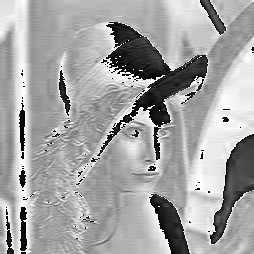

In [26]:
input = to_tensor(lena).unsqueeze(0)
print('input:',input)


#定义一个卷积核
kernel = t.ones(3,3,3)/ -9
kernel[1][1] = 1
conv = nn.Conv2d(1, 3, (3, 3), bias= False)
conv.weight.data = kernel.view(1, 3, 3, 3)

out = conv(V(input))
to_pil(out.data.squeeze(0))



In [18]:
input.shape

torch.Size([1, 3, 256, 256])

2.对黑白图像进行操作

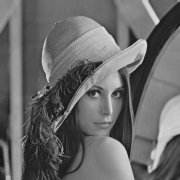

In [27]:
lena_gray = Image.open('../../data/imgs/lena_gray.jpg')
lena_gray

input_gray: tensor([[[[0.5451, 0.5451, 0.5451,  ..., 0.5020, 0.6039, 0.5686],
          [0.5451, 0.5451, 0.5451,  ..., 0.4902, 0.5098, 0.4784],
          [0.5412, 0.5412, 0.5412,  ..., 0.3412, 0.2667, 0.2235],
          ...,
          [0.1451, 0.1647, 0.1608,  ..., 0.1961, 0.2196, 0.2392],
          [0.1373, 0.1569, 0.1529,  ..., 0.2235, 0.2627, 0.2941],
          [0.1333, 0.1490, 0.1451,  ..., 0.2471, 0.2980, 0.3333]]]])


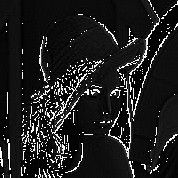

In [37]:
input_gray = to_tensor(lena_gray).unsqueeze(0)
print('input_gray:',input_gray)


#定义一个卷积核
kernel_gray = t.ones(3,3)/ -9
kernel_gray[1][1] = 1
conv_gray = nn.Conv2d(1, 1, (3, 3), bias= False)
conv_gray.weight.data = kernel_gray.view(1, 1, 3, 3)

out_gray = conv_gray(V(input_gray))
to_pil(out_gray.data.squeeze(0))


  
  ### 池化操作

In [29]:
pool = nn.AvgPool2d(2,2)#平均池化,将原图像的大小缩小一倍
list(pool.parameters())



[]

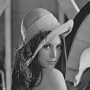

In [30]:
out = pool(input_gray)
to_pil(out.data.squeeze(0))


torch.Size([200, 200])
torch.Size([200, 200])


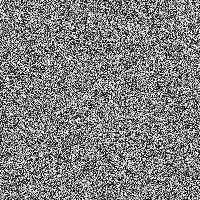

In [35]:
image_fake = t.randn(200,200)
image_fake = V(image_fake)
print(image_fake.shape)
print(image_fake.data.squeeze(0).shape)
to_pil(image_fake.data.squeeze(0))

    
     
     
### Linear层    

In [31]:
input = V(t.randn(2, 3))
linear = nn.Linear(3, 4)
h = linear(input)
h

tensor([[-0.3124,  0.2563,  0.3155, -0.3812],
        [-0.8737,  0.2186,  0.1879,  0.2259]], grad_fn=<AddmmBackward>)

In [39]:
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4) * 4
bn.bias.data = t.zeros(4)
bn_out = bn(h)

In [40]:
bn_out

tensor([[ 3.9997,  3.9449,  3.9951, -3.9998],
        [-3.9997, -3.9449, -3.9951,  3.9998]],
       grad_fn=<NativeBatchNormBackward>)